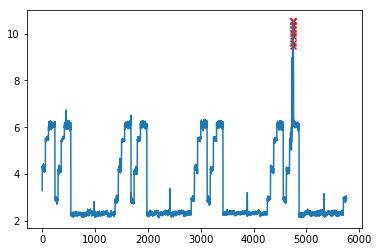

5760
5760
5760


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

coloumn_no = 2
#df = pd.read_excel('luminol_data.xlsx')
df = pd.read_excel('str_decomposition.xlsx')
series = []
for i in range(len(df)):
    series.append(df.iloc[i,coloumn_no])

q25_val = np.percentile(series, 25)
q75_val = np.percentile(series, 75)
iq_val = q75_val - q25_val
mild_anomaly_value = []
extreme_anomaly_value = []
for val in series:
    if ((val > (q75_val + (1.5 * iq_val))) or (val < (q25_val - (1.5 * iq_val)))):
        #print "Mild outlier value is: ", val
        mild_anomaly_value.append(val)
        extreme_anomaly_value.append(0)
    elif ((val > (q75_val + (3.0 * iq_val))) or (val < (q25_val - (3.0 * iq_val)))):
        #print "Extreme outlier value is: ", val
        extreme_anomaly_value.append(val)
        mild_anomaly_value.append(0)
    else:
        mild_anomaly_value.append(0)
        extreme_anomaly_value.append(0)
        
xaxis_value_mild = np.arange(len(mild_anomaly_value))
xaxis_value_extreme = np.arange(len(extreme_anomaly_value))
plt.scatter(xaxis_value_mild, [np.nan if x == 0 else x for x in mild_anomaly_value], color = "red", marker = 'x')
plt.scatter(xaxis_value_extreme, [np.nan if x == 0 else x for x in extreme_anomaly_value], color = "green", marker = 'x')
plt.plot(series)
plt.show()

print len(series)
print len(xaxis_value_mild)
print len(xaxis_value_extreme)